In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.0 MB/s 


In [2]:
!mkdir images

In [3]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/khandevane.jpg -P images

--2022-09-20 17:56:05--  https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/khandevane.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/khandevane.jpg [following]
--2022-09-20 17:56:05--  https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/khandevane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134153 (131K) [image/jpeg]
Saving to: ‘images/khandevane.jpg’

khandevane.jpg      100%[===================>] 131.01K  --.-KB/s    in 0.03s   

2022-09-20 17:56:06 (4.65 MB/s) - ‘images/

In [4]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [5]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# load image from file
pixels = plt.imread('test.jpg')

In [18]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [19]:
results[1:5]

[{'box': [70, 97, 71, 103],
  'confidence': 0.9973204731941223,
  'keypoints': {'left_eye': (84, 139),
   'right_eye': (119, 142),
   'nose': (97, 165),
   'mouth_left': (86, 176),
   'mouth_right': (118, 177)}}]

In [20]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        # show the plot
    plt.savefig('result.png')
    plt.show()

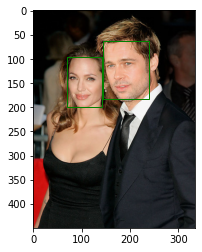

In [21]:
draw_facebox('test.jpg', results)

In [22]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=1, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

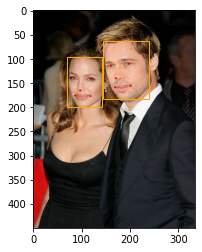

In [23]:
draw_facebox_and_keypoints('test.jpg', results)